In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [2]:
# Load the dataset
data = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')
data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [4]:
# Remove the first column as it is not a feature
data = data.iloc[:, 1:]
data.head()

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,12,10,8,13,12,14,21,6,14,11,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,6,3,2,7,1,6,3,3,3,2,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,11,8,9,10,8,7,13,12,6,14,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,8,13,5,9,6,9,13,13,11,8,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,5,13,11,6,7,9,14,9,9,11,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [5]:
# Scale the features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [6]:
# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)


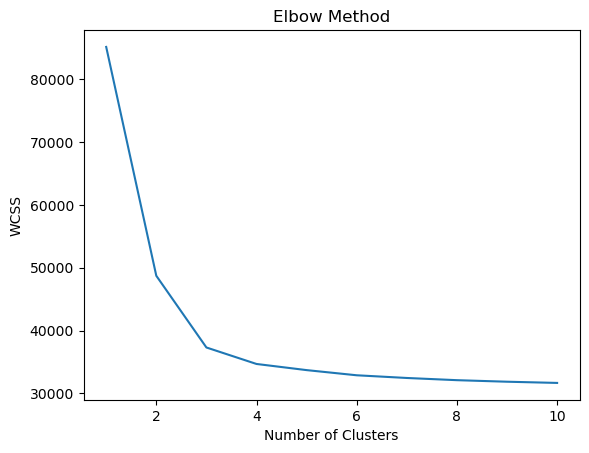

In [7]:
# Plot the elbow curve to determine the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The elbow method helps to determine the optimal number of clusters. In this case, we can see that the elbow point is around k=3. So, we will set the number of clusters to 3 for this dataset.

In [8]:
# Apply K-Means Clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_

In [9]:
# Use PCA to reduce the dimensionality of the data to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)


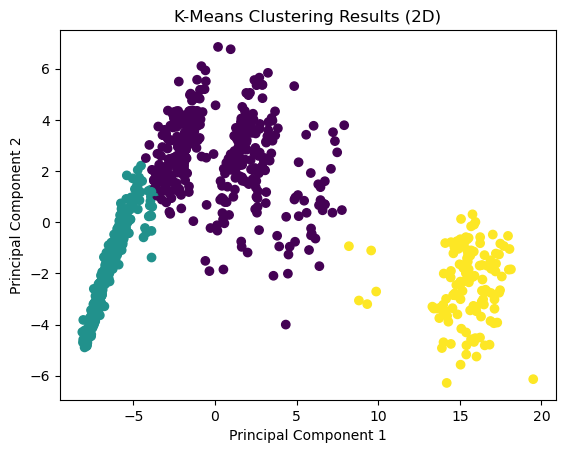

In [10]:
# Plot the results
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels)
plt.title('K-Means Clustering Results (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [11]:
# Use PCA to reduce the dimensionality of the data to 3 dimensions
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_scaled)

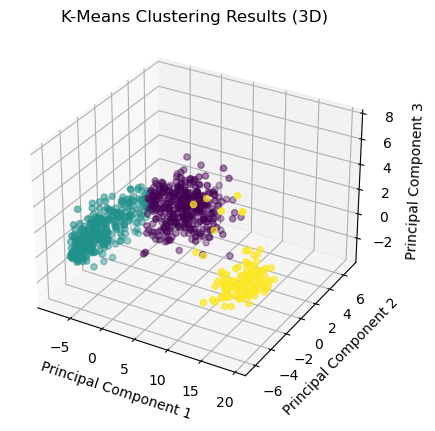

In [12]:
# Plot the results
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=labels)
ax.set_title('K-Means Clustering Results (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()